# Giới thiệu bài toán: 
- You should develop an algorithm to classify the pictures of Russian road signs by classes indicated in road traffic regulations. 

- The algorithm should be presented in the form of a product, where one can upload a road sign photo and obtain information on its class.
- Please, note that some signs (for example, 3.24 - maximum speed limit) have individual attributes, such as numbers showing the maximum speed limit. **You should determine these attributes for such signs, in addition to class.** --> tức là đối với một vài road signs thuộc vài class đặc biệt, ngoài việc determine hình ảnh đó thuộc class nào, chúng ta c òn phải xác định những cái attribute đi kèm với road sign đó

Ví dụ: 
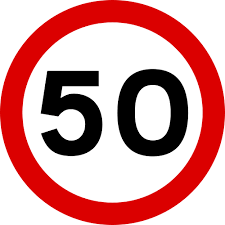

Ảnh phía trên là về speed limit, vì vậy ngoài việc xác định chính xác là ảnh này thuộc về class speed limit, chúng ta còn phải xác định là speed limit của nó là 50 miles/hour

# Giới thiệu dữ liệu: 
The input data will be as follows:

+ Archive with data on the task;
+ train.csv - annotations for training pictures;
+ train_images/ - a folder with training pictures;
+ 5_15_2_vocab.json - explanation of attributes for 5_15_2 (lưu ý, bộ annotation này chỉ dành riêng cho những luật lệ thuộc bộ 5.15.2)
 
Annotations contain the following fields:

filename - a path to the picture with the character;
label - a class mark to the character in the picture.

Such characters as 3_24, 3_25, 5_15_2, 5_31 and 6_2 have individual attributes. These attributes in the label field are separated by "+" - for example, 3_24+100. For 5_15_2, the attribute is the arrow direction, while for other characters, the attribute is numbers on the character.

## Giới thiệu những bộ annotation rõ hơn

- Trong file csv (xem ở dưới), những class target như 3_24, 3_25, 5_15_2, 5_31 và 6_2 sẽ có dạng như 3_24+100 hay 3_24+20 ...
- ví dụ như 3_24+100 nghĩa là ảnh này thuộc class 3_24 (hay nói rõ là road sign này thuộc luật 3_24), với speed-limit là 100

- Vô link này để hiểu rõ hơn: https://translate.google.com/translate?sl=ru&tl=en&u=https%3A%2F%2Favto-russia.ru%2Fpdd%2Fznaki5.html%3Fz%3D5.15.2

In [ ]:
import pandas as pd
import numpy as np
import PIL
from PIL import Image
import os
import matplotlib.pyplot as plt

In [ ]:
def show_image (link):
    image = Image.open(link)
    print(image.format)
    print(image.mode)
    
    nd_image= np.array(image)
    print(nd_image.shape)
    plt.imshow(nd_image, cmap ='gist_rainbow')
    
show_image('../input/road-sign-recognition/AIJ_2gisPUBLISH/AIJ_2gis/train_images/d234a538-4f2b-4e5a-8f1c-baf52839ea1e.png')

In [ ]:
train = pd.read_csv("../input/road-sign-recognition/AIJ_2gisPUBLISH/AIJ_2gis/train.csv")

In [ ]:
train.info(verbose= True, show_counts= True)

In [ ]:
train.head()

In [ ]:
print(train['label'].unique()) #tất cả các class của nó trong file csv

In [ ]:
train_1 = train.copy()

In [ ]:
numb = ' +'.join([str(x) for x in range (1,200)])
print(numb)

In [ ]:
print(f'{numb}')

In [ ]:
train_labels = train_1['label'].str.rstrip(f'{numb}')
print(train_labels)

In [ ]:
train_labels.head()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(train, x="label")
fig.show()